# Coursera - Analyzing criminal incident data 

## Install the RKernel

In [2]:
IRkernel::installspec()

In [7]:
getwd()

[1] "/Users/eweusthof/Documents/Coursera/Specialization_Data_Science_at_Scale/communicateResults"

In [6]:
setwd("~/Documents/Coursera/Specialization_Data_Science_at_Scale/communicateResults")

### Install packages

In [ ]:
install.packages("dplyr", "reshape")

### Load Libraries

In [4]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [72]:
library(ggplot2)

In [24]:
library(reshape)


Attaching package: ‘reshape’

The following object is masked from ‘package:dplyr’:

    rename



In [8]:
library(ggplot2)

In [105]:
options(repr.plot.width=8, repr.plot.height=2)

## How does the number of incidents vary by time?

## Read the Data

In [9]:
san.data <- read.csv("assignment6/sanfrancisco_incidents_summer_2014.csv")

In [10]:
seat.data <- read.csv("assignment6/seattle_incidents_summer_2014.csv")

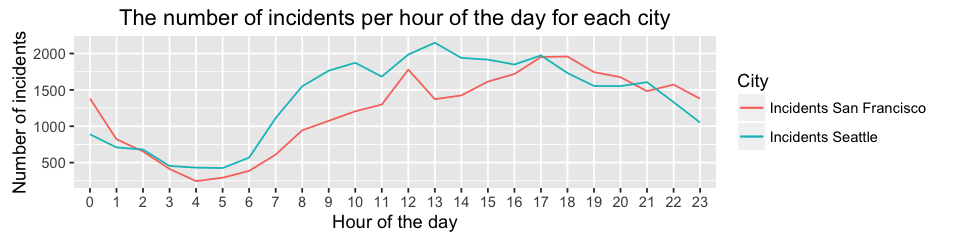

In [107]:
time.san <- san.data$Time
time.stp <- (strptime(time.san, "%H:%M"))
timetable <- as.data.frame(table(time.stp$hour))

repData <- (seat.data$Date.Reported)
time <- (strptime(repData, "%m/%d/%Y %I:%M:%S %p"))
timetable$new <- as.vector(table(time$hour))
names(timetable) <- c("Hours", "Inc.San", "Inc.Seat")

ggplot(timetable, aes(x = Hours, group=1)) + 
  geom_line(aes(y = Inc.San, colour='Incidents San Francisco')) + 
  geom_line(aes(y = Inc.Seat, colour = 'Incidents Seattle')) + 
  ylab(label="Number of incidents") + 
  xlab("Hour of the day") +
  ggtitle("The number of incidents per hour of the day for each city") +
  scale_color_discrete(name = "City")




### For either city, how do incidents vary by time of day? 


From the graph it can be seen that most incidents in San Fransisco occur between 01:00 in the after noon and 10:00 in the evening. 
In seatle most incidents rougly occur between 8 AM and 7 PM. One could conclude that incidents in Seattle take place earlier on average.

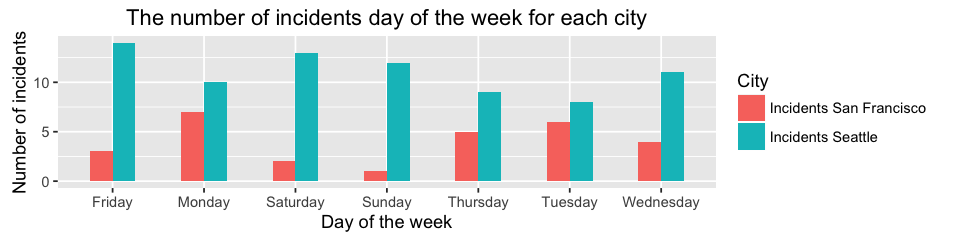

In [112]:

seat.data$weekdays <- weekdays(strptime(seat.data$Date.Reported, "%m/%d/%Y %I:%M:%S %p"))

total.table <- as.data.frame(table(seat.data$weekdays))
total.table2 <- as.data.frame(table(san.data$DayOfWeek))
new.table <- cbind(as.character(total.table$Var1), total.table$Freq, total.table2$Freq)
new.table <- as.data.frame(new.table)

df <- melt(new.table, id.vars='V1')

ggplot(df, aes(factor(V1), fill=variable, y=as.numeric(value),  width=.5)) + 
  geom_bar(stat = "identity", position = "dodge") +
  ylab(label="Number of incidents") + 
  xlab("Day of the week") +
  ggtitle("The number of incidents day of the week for each city") +
  scale_fill_discrete("City", 
                      breaks=c("V2","V3"), 
                      labels=c("Incidents San Francisco", "Incidents Seattle"))


### For either city, how do incidents vary by day of the week? 


From the graph it can be seen that most incidents occur on Friday and Sunday in Seattle. In San Francisco most incidents occur on Monday and Tuesday.